In [67]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,5)

In [68]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [69]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [70]:
data.shape

(5110, 12)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [72]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [73]:
data['bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [74]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [75]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [76]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [77]:
data.drop('id',axis=1,inplace=True)

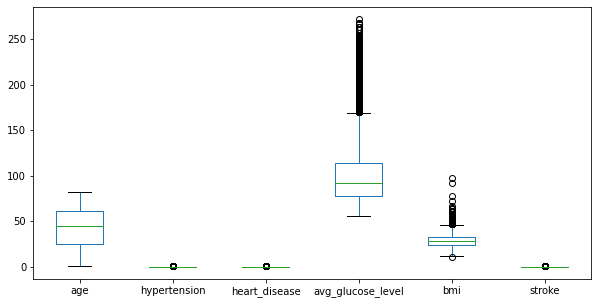

In [86]:
plt.rcParams['figure.figsize'] = (10,5)
data.plot(kind='box')
plt.show()

In [87]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [88]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [89]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [90]:
gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
ever_married = enc.fit_transform(data['ever_married'])

In [91]:
data['work_type'] = work_type
data['gender'] = gender
data['smoking_status'] = smoking_status
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married

In [92]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [94]:
X = data.drop('stroke', axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [95]:
Y = data['stroke']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [96]:
#splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

In [97]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [98]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [99]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [100]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [101]:
#normalization

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [102]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [103]:
import pickle
import os

In [108]:
scaler_path=os.path.join('C:/Users/Kamya Jain/Brain Stroke/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [109]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [110]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

In [111]:
#training the data

In [112]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [113]:
dt.score(X_test_std, Y_test)

0.9090019569471625

In [114]:
dt_Y_pred = dt.predict(X_test_std)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
acc_dt = accuracy_score(Y_test, dt_Y_pred)
acc_dt

0.9090019569471625

In [117]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, dt_Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       968
           1       0.19      0.22      0.21        54

    accuracy                           0.91      1022
   macro avg       0.57      0.58      0.58      1022
weighted avg       0.92      0.91      0.91      1022



In [118]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [119]:
lr_Y_pred = lr.predict(X_test_std)

In [120]:
acc_lr = accuracy_score(Y_test, lr_Y_pred)
acc_lr

0.9471624266144814

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [123]:
knn_Y_pred = knn.predict(X_test_std)

In [124]:
acc_knn = accuracy_score(Y_test, knn_Y_pred)
acc_knn

0.9452054794520548

In [125]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.25      0.02      0.03        54

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.91      0.95      0.92      1022



In [126]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [127]:
rf_Y_pred = rf.predict(X_test_std)

In [128]:
acc_rf = accuracy_score(Y_test, rf_Y_pred)
acc_rf

0.9442270058708415

In [129]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf_Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



In [130]:
# SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, Y_train)

SVC()

In [131]:
svm_Y_pred = svm.predict(X_test_std)

In [132]:
acc_svm = accuracy_score(Y_test, svm_Y_pred)
acc_svm

0.9471624266144814

In [133]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, svm_Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_std, Y_train)

GaussianNB()

In [135]:
nb_Y_pred = nb.predict(X_test_std)

In [136]:
acc_nb = accuracy_score(Y_test, nb_Y_pred)
acc_nb

0.8698630136986302

In [137]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, nb_Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       968
           1       0.16      0.33      0.21        54

    accuracy                           0.87      1022
   macro avg       0.56      0.62      0.57      1022
weighted avg       0.92      0.87      0.89      1022



In [138]:
#visualization

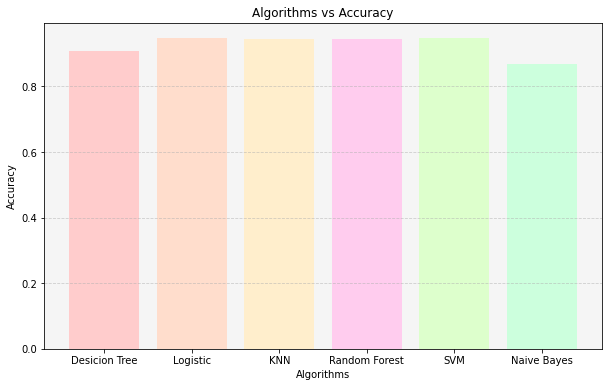

In [139]:
colors = ['#FFCCCC', '#FFDDCC', '#FFEECC', '#FFCCEE', '#DDFFCC', '#CCFFDD']
plt.figure(figsize=(10, 6))
plt.bar(['Desicion Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes'], [acc_dt, acc_lr, acc_knn, acc_rf, acc_svm, acc_nb], color = colors)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#F5F5F5')
plt.title("Algorithms vs Accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

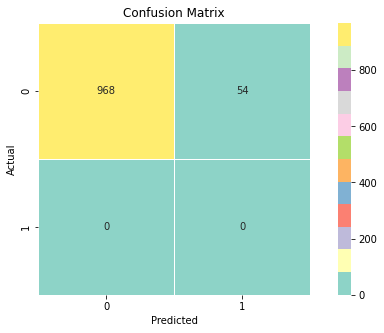

In [140]:
#Confusion matrix for logistic Regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lr_Y_pred,Y_test)
cmap = sns.color_palette("Set3")
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, linewidths=0.5, square=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

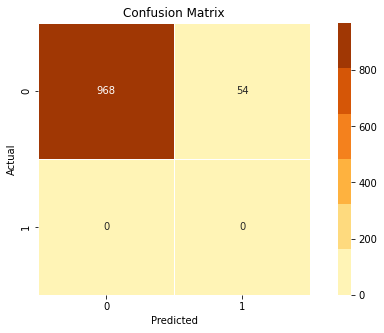

In [141]:
#Confusion matrix for SVM

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(svm_Y_pred,Y_test)
cmap = sns.color_palette("YlOrBr")
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=cmap, linewidths=0.5, square=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

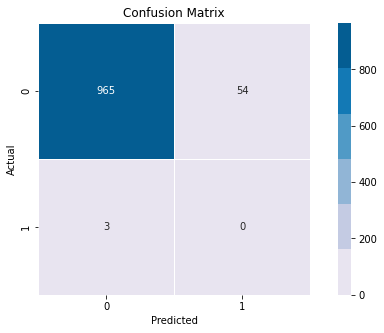

In [142]:
#Confusion matrix for Random Forest

from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(rf_Y_pred,Y_test)
cmap = sns.color_palette("PuBu")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=cmap, linewidths=0.5, square=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [145]:
import joblib
model_path = os.path.join('C:/Users/Kamya Jain/Brain Stroke/', 'models/dt.sav')
joblib.dump(dt, model_path)

['C:/Users/Kamya Jain/Brain Stroke/models/dt.sav']